Title: Popular Classification Algorithms

Random Forest

Task 1: Predict employee attrition based on job satisfaction and salary.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



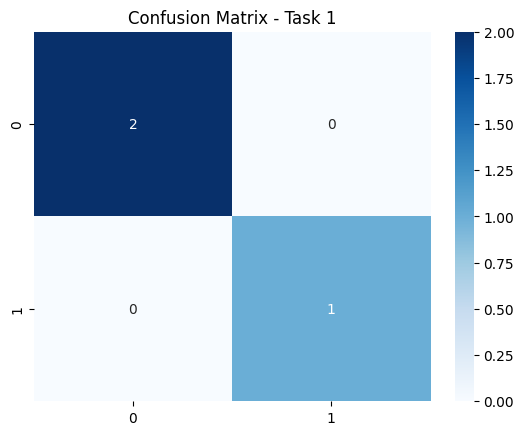

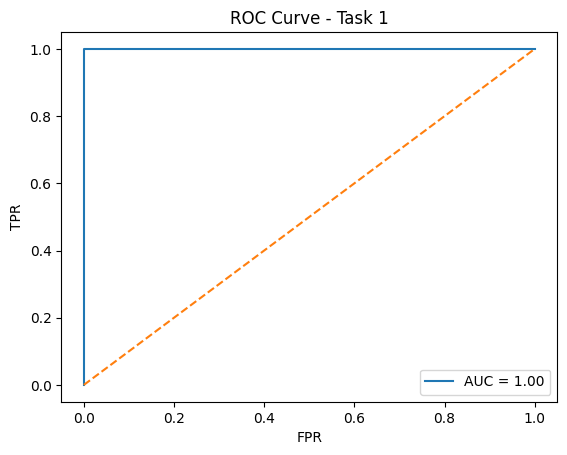

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Task 1: Employee Attrition
try:
    data = {
        'job_satisfaction': [3, 4, 2, 5, 3, 4, 2, 5, 3, 4],
        'salary': [50000, 60000, 40000, 70000, 50000, 60000, 40000, 70000, 50000, 60000],
        'attrition': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
    }

    df = pd.DataFrame(data)
    if df.empty:
        raise ValueError("Task 1 DataFrame is empty")

    le = LabelEncoder()
    df['attrition'] = le.fit_transform(df['attrition'])

    X = df[['job_satisfaction', 'salary']]
    y = df['attrition']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n", classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
    plt.title("Confusion Matrix - Task 1")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("ROC Curve - Task 1")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()

except Exception as e:
    print("Task 1 Error:", e)


Task 2: Classify types of wine based on chemical analysis.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



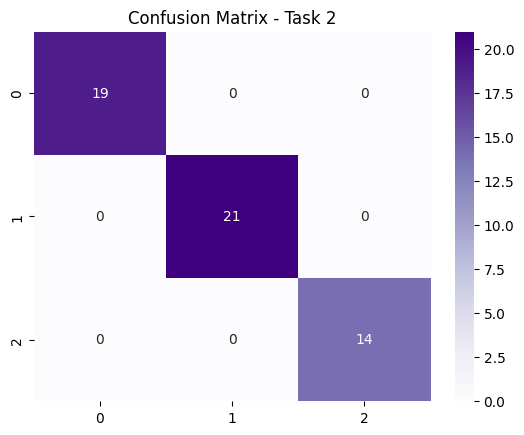

In [3]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Task 2: Wine Classification
try:
    wine = load_wine()
    X = wine.data
    y = wine.target

    if X.size == 0 or y.size == 0:
        raise ValueError("Task 2 data is empty")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:\n", classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples')
    plt.title("Confusion Matrix - Task 2")
    plt.show()

except Exception as e:
    print("Task 2 Error:", e)



Task 3: Predict housing loan approval based on financial and personal data.

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


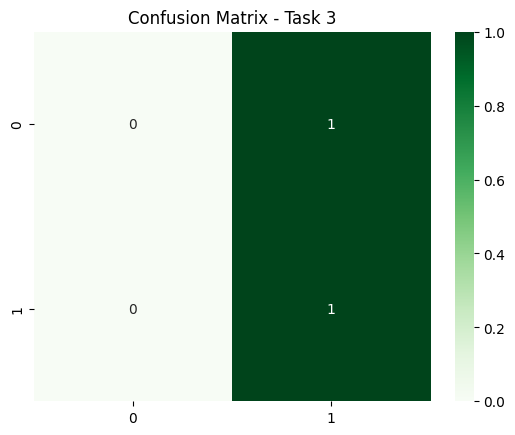

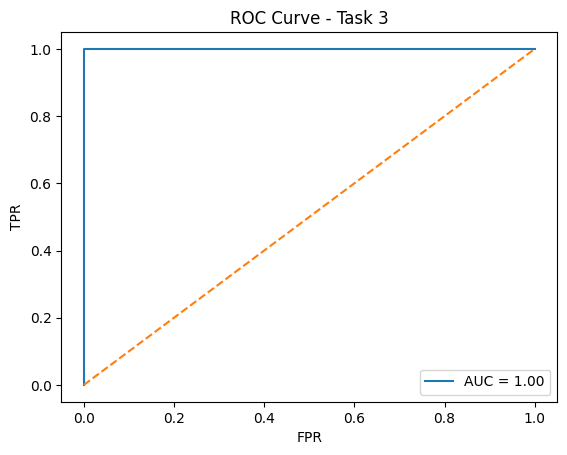

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Task 3: Housing Loan Approval
try:
    data = {
        'income': [50000, 60000, 40000, 120000, 80000],
        'age': [25, 35, 45, 50, 30],
        'credit_score': [700, 650, 620, 750, 680],
        'loan_amount': [100000, 150000, 80000, 200000, 120000],
        'marital_status': ['single', 'married', 'married', 'single', 'married'],
        'loan_approval': [1, 1, 0, 1, 0]
    }

    df = pd.DataFrame(data)
    if df.empty:
        raise ValueError("Task 3 DataFrame is empty")

    df['marital_status'] = df['marital_status'].map({'single': 0, 'married': 1})
    X = df.drop('loan_approval', axis=1)
    y = df['loan_approval']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n", classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens')
    plt.title("Confusion Matrix - Task 3")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("ROC Curve - Task 3")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()

except Exception as e:
    print("Task 3 Error:", e)
